In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

# Loading the Internet Advertisement Dataset. Low Memory is used for Internally process the file in chunks.
Internet_Advertisement_Dataset = pd.read_csv("Internet_Advertisement_dataset.csv", index_col=0, low_memory= False)

Internet_Advertisement_Dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.


In [0]:
import numpy as np

# applymap runs elementwise on each record taking a function as input. The lambda function is just replacing all '?' with nan.
Internet_Advertisement_Dataset = Internet_Advertisement_Dataset.applymap(lambda val: np.nan if str(val).strip() == '?' else val)

# Now Just droppong the nan values.
Internet_Advertisement_Dataset = Internet_Advertisement_Dataset.dropna()


In [0]:
# Displayig label before Encoding.
display(Internet_Advertisement_Dataset.iloc[:, -1])

0          ad.
1          ad.
2          ad.
3          ad.
4          ad.
         ...  
3273    nonad.
3274    nonad.
3275    nonad.
3276    nonad.
3278    nonad.
Name: 1558, Length: 2359, dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

lable_Encoder = LabelEncoder()
y = lable_Encoder.fit_transform(Internet_Advertisement_Dataset.iloc[:, -1])
X = Internet_Advertisement_Dataset.iloc[:,:-1]

In [0]:
# Labels after encoding 0= ad. ; 1=nonad.
display(y)

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
# Dataset after removing the labels
display(X.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,125,125,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,57,468,8.2105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33,230,6.9696,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

# Normalizing using Standard Scalar ==> The standard score of a sample x is calculated as: z = (x - u) / s, where u is mean and s is standard deviation
standard_Scalar = StandardScaler()
X = standard_Scalar.fit_transform(X)

# **Importance of Bag_Percent_Size**
The importance of the bag percent size is that it is used to help in drawing the **N percent** of samples from the dataset to train each base estimator i.e. Decision Tree.

Each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.

In [0]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 


def Apply_Bagging( bag_percent_size=10, splits=10, seed=1887, num_trees=50):
    
    # 10 Fold CV
    kfold = model_selection.KFold(n_splits = splits)     

    # Bagging Classifier
    Bagging_Model = BaggingClassifier(
                              base_estimator = DecisionTreeClassifier(), # Using Base Estimator as Decision Tree Classifier
                              n_estimators = num_trees,                  # The number of base estimators in the ensemble trying with 50, default is 10 
                              random_state = seed,                       # Learn about the above value from the internet.
                              max_samples=(bag_percent_size/100.0)       # The number of samples to draw from X to train each base estimator.  
                    ) 
    
    # Evaluate a score by cross-validation
    accuracies = model_selection.cross_val_score( Bagging_Model, X, y, cv = kfold) 
    return accuracies.mean() 

In [0]:

Accuracies = []
# Running Bagging for bag_percent_size from 10 to 100 with step size of 10. Spilts = 10 indicates Bagging with 10 CV.
for bag_percent_size in range(10, 101, 10):
    accuracy = Apply_Bagging(bag_percent_size= bag_percent_size, splits=10)
    print ("For Bag Percent Size: ", bag_percent_size,"\tGot Accuracy: ", accuracy)    
    Accuracies.append([bag_percent_size, accuracy])

For Bag Percent Size:  10 	Got Accuracy:  0.9351658853227551
For Bag Percent Size:  20 	Got Accuracy:  0.9398269022719076
For Bag Percent Size:  30 	Got Accuracy:  0.9423674720519294
For Bag Percent Size:  40 	Got Accuracy:  0.9478741435268662
For Bag Percent Size:  50 	Got Accuracy:  0.9516895059502344
For Bag Percent Size:  60 	Got Accuracy:  0.9499945906959972
For Bag Percent Size:  70 	Got Accuracy:  0.9491471330688785
For Bag Percent Size:  80 	Got Accuracy:  0.9508420483231157
For Bag Percent Size:  90 	Got Accuracy:  0.9457554994590696
For Bag Percent Size:  100 	Got Accuracy:  0.9347385503065272


In [0]:
Accuracies_In_DataFrame_Format = pd.DataFrame(Accuracies)
Accuracies_In_DataFrame_Format.columns = ['Bag_Percent_Size', 'Accuracy']
Accuracies_In_DataFrame_Format

,Bag_Percent_Size,Accuracy
0,10,0.935166
1,20,0.939827
2,30,0.942367
3,40,0.947874
4,50,0.951690
5,60,0.949995
6,70,0.949147
7,80,0.950842
8,90,0.945755
9,100,0.934739


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


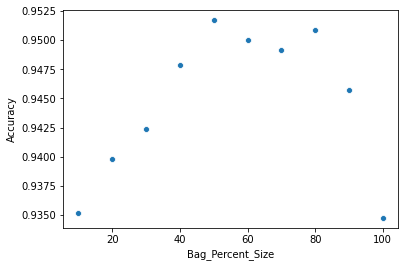

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.scatterplot(data=Accuracies_In_DataFrame_Format, x='Bag_Percent_Size', y='Accuracy')
plt.show()

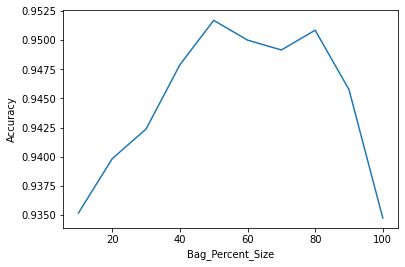

In [0]:
sb.lineplot(data=Accuracies_In_DataFrame_Format, x='Bag_Percent_Size', y='Accuracy')
plt.show()